In [ ]:
import numpy as np # linear algebra
from numpy import array
import pandas as pd # data processing
import matplotlib.pyplot as plt
import glob
import os
from pathlib import Path
from scipy.interpolate import griddata

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
df7 = pd.concat(dfs, ignore_index=True)
#print(df7)

Mounted at /content/gdrive
8


In [ ]:
sheet = (len(df7.index))/(len(count_f))
print(sheet)

520.0


In [ ]:
#laju alir
#print(df7.loc[9])

#temperatur
#print(df7.loc[10])

#sheet
#print(df7)
print(df7.loc[378])

CHEMCAD        Stream No.
6.1.4                   1
Page                    2
1                       3
Unnamed: 4              4
Unnamed: 5              5
Unnamed: 6            6.0
Unnamed: 7            7.0
Unnamed: 8            8.0
Unnamed: 9            9.0
Unnamed: 10            10
Unnamed: 11          11.0
Unnamed: 12          12.0
Unnamed: 13          13.0
Unnamed: 14          14.0
Unnamed: 15          15.0
file            stream 20
Name: 378, dtype: object


In [ ]:
#Laju Aliran
a = 9
data_7 = list()
while a < len(df7.index):
    mass_flow = df7.loc[a]
    #print(mass_flow)
    data_7.append(mass_flow[1])
    #data_7 = [*set(data_7)]
    a = sheet + a
data_7 = [eval(i) for i in data_7]
data_7.sort(reverse=False)
print(data_7)
print(len(data_7))

[13, 14, 15, 16, 17, 18, 19, 20]
8


In [ ]:
print(df7.loc[10])

CHEMCAD           Temp C
6.1.4           631.0131
Page            236.7325
1                622.958
Unnamed: 4            28
Unnamed: 5      457.2954
Unnamed: 6      194.5841
Unnamed: 7      236.7229
Unnamed: 8      246.3117
Unnamed: 9       83.3484
Unnamed: 10           28
Unnamed: 11     175.1183
Unnamed: 12      83.3513
Unnamed: 13      41.7687
Unnamed: 14         32.0
Unnamed: 15     107.6212
file           stream 20
Name: 10, dtype: object


## **Sistem Kogenerasi**

In [ ]:
#Aliran 4, Temperatur masuk steam
s = 10
data_t4 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t4.append(temp_reac[4])
 #data_t4 = [*set(data_t4)]
  s = sheet + s
data_t4 = [eval(i) for i in data_t4]
data_t4.sort(reverse=False)
print(data_t4)
print(len(data_t4))

[28, 28, 28, 28, 28, 28, 28, 28]
8


In [ ]:
#ALIRAN 1, Temperatur masuk sistem kogenerasi Siklus helium
s = 10
data_t1 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t1.append(temp_reac[1])
  #data_t1 = [*set(data_t1)]
  s = sheet + s
data_t1 = [eval(i) for i in data_t1]
#data_t1.sort(reverse=False)
print(data_t1)
print(len(data_t1))

[700, 675.3518, 638.1827, 606.826, 580.7853, 555.1359, 533.401, 513.9065]
8


In [ ]:
#ALIRAN 3, Temperatur keluar kogenerasi
s = 10
data_t3 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t3.append(temp_reac[3])
  #data_t3 = [*set(data_t3)]
  s = sheet + s
data_t3 = [eval(i) for i in data_t3]
data_t3.sort(reverse=True)
print(data_t3)
print(len(data_t3))

[699.8976, 675.26, 630.0385, 606.7173, 580.6692, 547.2842, 525.6218, 506.1973]
8


In [ ]:
#ALIRAN 5, Temperatur masuk kogenerasi
s = 10
data_t5 = list()
while s<len(df7.index):
  temp_reac = df7.loc[s]
  data_t5.append(temp_reac[5])
  #data_t5 = [*set(data_t5)]
  s = sheet + s
data_t5 = [eval(i) for i in data_t5]
data_t5.sort(reverse=False)
print(data_t5)
print(len(data_t5))

[352.7862, 361.6075, 371.2125, 381.8104, 391.8899, 405.5348, 419.0123, 419.7595]
8


## Grafik Karakteristik Temperatur Keluar Steam Generator

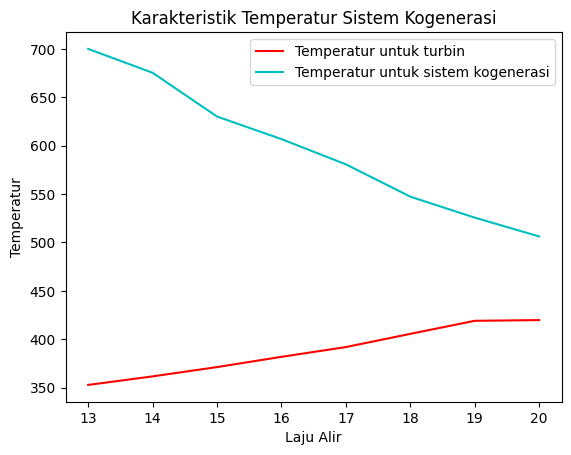

In [ ]:
# Using Numpy to create an array X
X = np.array(data_7)

# Siklus Primer
y = np.array(data_t5) #keluar
y1 = np.array(data_t1) #masuk
# Sistem Kogenerasi
y2 = np.array(data_t4) #masuk
y3 = np.array(data_t3) #keluar

# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y, 'r', label='Temperatur untuk turbin')
#ax.plot(X, y1, 'g', label='Temperatur masuk siklus primer')
#ax.plot(X, y2, 'b', label='Temperatur masuk sistem kogenerasi')
ax.plot(X, y3, 'c', label='Temperatur untuk sistem kogenerasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir")
plt.ylabel("Temperatur")
plt.title("Karakteristik Temperatur Sistem Kogenerasi")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

## Power Pada Turbin

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
path = r'/content/gdrive/My Drive/' # use your path
files = Path(path).glob('*.csv')  # .rglob to get subdirectories
count_f = glob.glob(path + "/*.csv")
print(len(count_f))
dfs = list()
for f in files:
  for i in range (len(count_f)):
    data = pd.read_csv(f)
    #print(data)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['file'] = f.stem
    dfs.append(data)
dfpower = pd.concat(dfs, ignore_index=True)
#print(df7)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
8


In [ ]:
sheet2 = (len(dfpower.index))/(len(count_f))
print(sheet2)

552.0


In [ ]:
#daya heat exchanger
#print(dfpower.iloc[15])

#daya reaktor
#print(dfpower.iloc[29])

#daya blower
#print(dfpower.iloc[44])

#daya turbin
#print(dfpower.iloc[63])

In [ ]:
#DAYA REAKTOR
p = 29
daya_reaktor = list()
while p<len(dfpower.index):
  daya_reac = dfpower.loc[p]
  daya_reaktor.append(daya_reac[1])
  #daya_reaktor = [*set(daya_reaktor)]
  p = sheet2 + p
daya_reaktor = [eval(i) for i in daya_reaktor]
#daya_reaktor.sort(reverse=False)
print(daya_reaktor)
print(len(daya_reaktor))

[40, 40, 40, 40, 40, 40, 40, 40]
8


# **Daya Listrik**

In [ ]:
#TURBIN, ACTUAL POWER MJ/S
p = 63
daya_turbin = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_turbin.append(data[1])
  #daya_turbin = [*set(daya_turbin)]
  p = sheet2 + p
daya_turbin = [eval(i) for i in daya_turbin]
daya_turbin = [ -x for x in daya_turbin]
daya_turbin.sort(reverse=False)
print(daya_turbin)
print(len(daya_turbin))

[5.9869, 6.4405, 6.7668, 7.0735, 7.4023, 7.7116, 8.0193, 8.3246]
8


In [ ]:
#BLOWER 3
p = 44
daya_blower = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_blower.append(data[1])
  daya_blower = [*set(daya_blower)]
  p = sheet2 + p
daya_blower = [eval(i) for i in daya_blower]
#daya_blower = [ -x for x in daya_blower]
daya_blower.sort(reverse=False)
print(daya_blower)
print(len(daya_blower))

[4.6347, 5.0229, 5.3746, 5.743, 6.1361, 6.4889, 6.8624, 7.237]
8


In [ ]:
#COMPRESSOR 5
p = 44
daya_compressor = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_compressor.append(data[2])
  #daya_compressor = [*set(daya_compressor)]
  p = sheet2 + p
daya_compressor = [eval(i) for i in daya_compressor]
#daya_compressor = [ -x for x in daya_compressor]
daya_compressor.sort(reverse=False)
print(daya_compressor)
print(len(daya_compressor))

[0.002, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021, 0.0021]
8


In [ ]:
daya_kebutuhanlistrik = list()
for i in range (len(daya_turbin)):
  #daya_list = daya_blower[i]+daya_compressor[i]
  daya_list = daya_turbin[i]-daya_blower[i]-daya_compressor[i]
  daya_kebutuhanlistrik.append(daya_list)
print(daya_kebutuhanlistrik)

[1.3502000000000007, 1.4155000000000002, 1.3901, 1.3283999999999998, 1.2641000000000004, 1.2205999999999997, 1.1547999999999994, 1.0855000000000001]


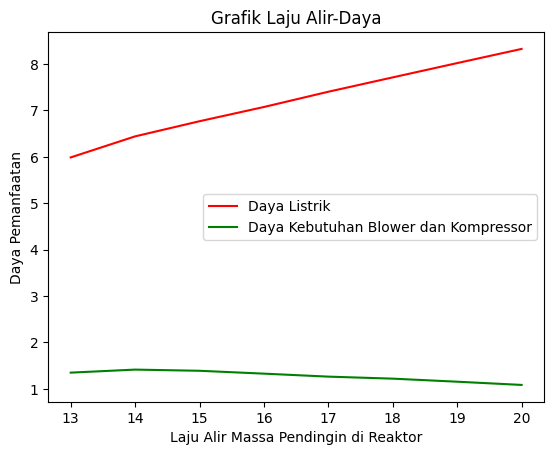

In [ ]:
# Using Numpy to create an array X
X = np.array(data_7)

# Assign variables to the y axis part of the curve
y = np.array(daya_turbin)
y1 = np.array(daya_kebutuhanlistrik)
#y2 = np.array(daya_desalinasi)

# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y, 'r', label='Daya Listrik')
ax.plot(X, y1, 'g', label='Daya Kebutuhan Blower dan Kompressor')
#ax.plot(X, y2, 'b', label='Daya Desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir Massa Pendingin di Reaktor")
plt.ylabel("Daya Pemanfaatan")
plt.title("Grafik Laju Alir-Daya")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

# **Produksi Hidrogen**

In [ ]:
#Heat Exchanger 4
p = 15
daya_hidrogen = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_hidrogen.append(data[2])
  #daya_hidrogen = [*set(daya_hidrogen)]
  p = sheet2 + p
daya_hidrogen = [eval(i) for i in daya_hidrogen]
#daya_hidrogen = [ -x for x in daya_hidrogen]
daya_hidrogen.sort(reverse=False)
print(daya_hidrogen)
print(len(daya_hidrogen))

[16.7525, 16.9689, 17.2107, 17.5844, 17.8774, 18.1409, 18.6554, 18.9379]
8


# **Desalinasi**

In [ ]:
#Heat Exchanger 7
p = 15
daya_sistem = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_sistem.append(data[3])
  #daya_sistem = [*set(daya_sistem)]
  p = sheet2 + p
daya_sistem = [eval(i) for i in daya_sistem]
#daya_sistem = [ -x for x in daya_sistem]
daya_sistem.sort(reverse=False)
print(daya_sistem)
print(len(daya_sistem))

[18.6895, 19.9272, 20.4653, 20.7921, 21.1518, 21.5691, 21.8683, 22.1726]
8


In [ ]:
#Heat Exchanger 1
p = 15
daya_desalinasi = list()
while p<len(dfpower.index):
  data = dfpower.loc[p]
  daya_desalinasi.append(data[3])
  #daya_desalinasi = [*set(daya_desalinasi)]
  p = sheet2 + p
daya_desalinasi = [eval(i) for i in daya_desalinasi]
#daya_desalinasi = [ -x for x in daya_desalinasi]
daya_desalinasi.sort(reverse=False)
print(daya_desalinasi)
print(len(daya_desalinasi))

[18.6895, 19.9272, 20.4653, 20.7921, 21.1518, 21.5691, 21.8683, 22.1726]
8


## **GRAFIK DAYA PEMANFAATAN SETIAP PROSES**

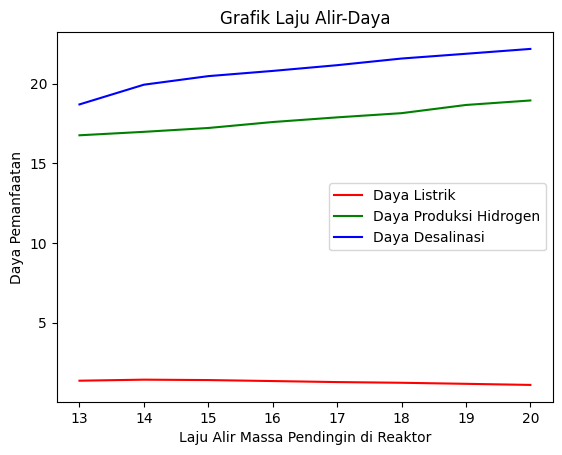

In [ ]:
# Using Numpy to create an array X
X = np.array(data_7)

# Assign variables to the y axis part of the curve
y = np.array(daya_kebutuhanlistrik)
y1 = np.array(daya_hidrogen)
y2 = np.array(daya_desalinasi)

# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y, 'r', label='Daya Listrik')
ax.plot(X, y1, 'g', label='Daya Produksi Hidrogen')
ax.plot(X, y2, 'b', label='Daya Desalinasi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir Massa Pendingin di Reaktor")
plt.ylabel("Daya Pemanfaatan")
plt.title("Grafik Laju Alir-Daya")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

## EUF

In [ ]:
data_euf = []
for i in range (len(daya_kebutuhanlistrik)):
  EUF = (daya_kebutuhanlistrik[i]+daya_hidrogen[i]+daya_desalinasi[i]-daya_sistem[i])/40
  EUF = EUF*100
  data_euf.append(EUF)
print(data_euf)

[45.256750000000004, 45.961, 46.501999999999995, 47.28199999999998, 47.85375, 48.40375, 49.525499999999994, 50.058499999999995]


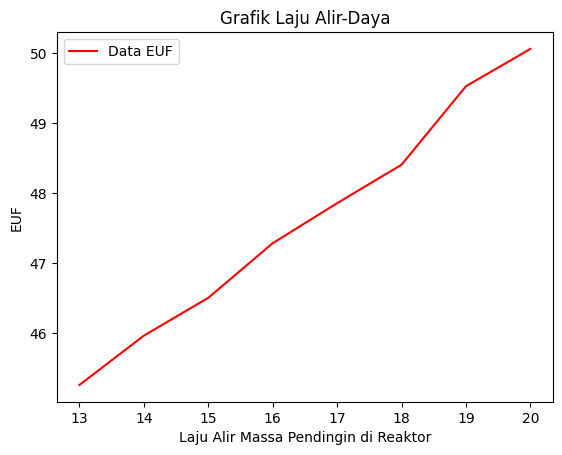

In [ ]:
# Using Numpy to create an array X
X = np.array(data_7)

# Assign variables to the y axis part of the curve
y = np.array(data_euf)

# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y, 'r', label='Data EUF')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir Massa Pendingin di Reaktor")
plt.ylabel("EUF")
plt.title("Grafik Laju Alir-Daya")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

## Efisiensi

In [ ]:
data_efisiensi = []
for i in range (len(daya_kebutuhanlistrik)):
  efisiensi = (daya_kebutuhanlistrik[i])/(40-daya_hidrogen[i])*100
  data_efisiensi.append(efisiensi)
print(data_efisiensi)

[5.807936337240567, 6.146037314761346, 6.099792446455134, 5.926229947001194, 5.714066158588957, 5.58394444419029, 5.4102677023696835, 5.153807075267899]


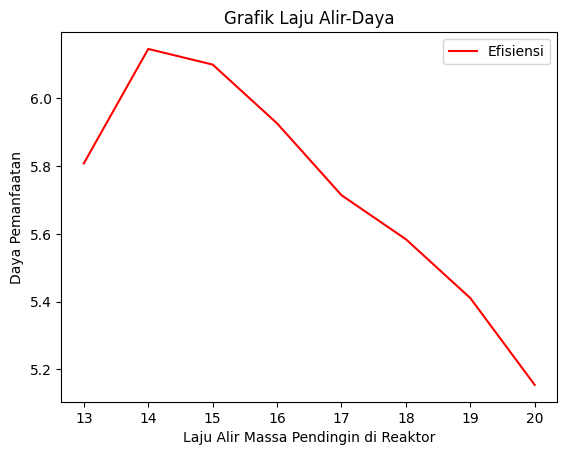

In [ ]:
# Using Numpy to create an array X
X = np.array(data_7)

# Assign variables to the y axis part of the curve
y = np.array(data_efisiensi)

# Plotting both the curves simultaneously
fig, ax = plt.subplots()
ax.plot(X, y, 'r', label='Efisiensi')

# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Laju Alir Massa Pendingin di Reaktor")
plt.ylabel("Daya Pemanfaatan")
plt.title("Grafik Laju Alir-Daya")

# Adding legend, which helps us recognize the curve according to it's color
plt.legend()

# To load the display window
plt.show()

In [ ]:
tabel = ['Laju Alir Massa Pendingin di Reaktor', 'Daya Listrik', 'Daya Produksi Hidrogen', 'Daya Desalinasi']
isi = list(zip(data_7, daya_kebutuhanlistrik, daya_hidrogen, daya_desalinasi))
dftabel = pd.DataFrame(isi, columns=['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik (MW)', 'Daya Produksi Hidrogen (MW)', 'Daya Desalinasi (MW)'])
dftabel

,Laju Alir Massa Pendingin di Reaktor (Kg/s),Daya Listrik (MW),Daya Produksi Hidrogen (MW),Daya Desalinasi (MW)
0,13,1.3502,16.7525,18.6895
1,14,1.4155,16.9689,19.9272
2,15,1.3901,17.2107,20.4653
3,16,1.3284,17.5844,20.7921
4,17,1.2641,17.8774,21.1518
5,18,1.2206,18.1409,21.5691
6,19,1.1548,18.6554,21.8683
7,20,1.0855,18.9379,22.1726


import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Listrik (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Desalinasi (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Listrik (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Desalinasi (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3315440235710722246, *[[['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik (MW)'], ['Daya Listrik (MW)', 'Daya Produksi Hidrogen (MW)'], ['Daya Produksi Hidrogen (MW)', 'Daya Desalinasi (MW)']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik (MW)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)', 'Daya Listrik (MW)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Listrik (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def value_plot(df, y, sort_ascending=False, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  if sort_ascending:
    df = df.sort_values(y).reset_index(drop=True)
  _, ax = plt.subplots(figsize=figsize)
  df[y].plot(kind='line')
  plt.title(y)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_3315440235710722246, *['Daya Desalinasi (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Listrik (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def histogram(df, colname, num_bins=20, figsize=(2, 1)):
  from matplotlib import pyplot as plt
  _, ax = plt.subplots(figsize=figsize)
  plt.hist(df[colname], bins=num_bins, histtype='stepfilled')
  plt.ylabel('count')
  plt.title(colname)
  ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_3315440235710722246, *['Daya Desalinasi (MW)'], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def scatter_plots(df, colname_pairs, scatter_plot_size=2.5, size=8, alpha=.6):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * scatter_plot_size, scatter_plot_size))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    ax.scatter(df[x_colname], df[y_colname], s=size, alpha=alpha)
    plt.xlabel(x_colname)
    plt.ylabel(y_colname)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_3315440235710722246, *[[['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik (MW)'], ['Daya Listrik (MW)', 'Daya Produksi Hidrogen (MW)'], ['Daya Produksi Hidrogen (MW)', 'Daya Desalinasi (MW)']]], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'Daya Listrik (MW)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Laju Alir Massa Pendingin di Reaktor (Kg/s)', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)', 'Daya Listrik (MW)', None], **{})
chart

import numpy as np
from google.colab import autoviz
df_3315440235710722246 = autoviz.get_df('df_3315440235710722246')

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figsize=(2.5, 1.3), mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(df_3315440235710722246, *['Daya Produksi Hidrogen (MW)', 'count()', None], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.
